In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
# Load Data
data = pd.read_csv("/content/drive/MyDrive/mushrooms.csv")

In [ ]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Check for missing values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
# Check for duplicate values
data.duplicated().sum()

0

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include='object'):
  data[col] = le.fit_transform(data[col])

In [ ]:
# Normalize numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col in data.select_dtypes(include='int64'):
  data[col] = scaler.fit_transform(data[[col]])

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9489230769230769


In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [31]:
# Evaluate the models using metrics like accuracy, precision, recall, and
# F1-score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
y_pred_lr = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average="macro")
recall_lr = recall_score(y_test, y_pred_lr, average="macro")
f1_lr = f1_score(y_test, y_pred_lr, average="macro")

# Decision Trees
y_pred_dt = model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average="macro")
recall_dt = recall_score(y_test, y_pred_dt, average="macro")
f1_dt = f1_score(y_test, y_pred_dt, average="macro")

# Random Forests
y_pred_rf = model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average="macro")
recall_rf = recall_score(y_test, y_pred_rf, average="macro")
f1_rf = f1_score(y_test, y_pred_rf, average="macro")

# Support Vector Machines
y_pred_svm = model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average="macro")
recall_svm = recall_score(y_test, y_pred_svm, average="macro")
f1_svm = f1_score(y_test, y_pred_svm, average="macro")

# Print the results
print("Logistic Regression:")
print("- Accuracy:", accuracy_lr)
print("- Precision:", precision_lr)
print("- Recall:", recall_lr)
print("- F1 Score:", f1_lr)

print("\nDecision Trees:")
print("- Accuracy:", accuracy_dt)
print("- Precision:", precision_dt)
print("- Recall:", recall_dt)
print("- F1 Score:", f1_dt)

print("\nRandom Forests:")
print("- Accuracy:", accuracy_rf)
print("- Precision:", precision_rf)
print("- Recall:", recall_rf)
print("- F1 Score:", f1_rf)

print("\nSupport Vector Machines:")
print("- Accuracy:", accuracy_svm)
print("- Precision:", precision_svm)
print("- Recall:", recall_svm)
print("- F1 Score:", f1_svm)


Logistic Regression:
- Accuracy: 1.0
- Precision: 1.0
- Recall: 1.0
- F1 Score: 1.0

Decision Trees:
- Accuracy: 1.0
- Precision: 1.0
- Recall: 1.0
- F1 Score: 1.0

Random Forests:
- Accuracy: 1.0
- Precision: 1.0
- Recall: 1.0
- F1 Score: 1.0

Support Vector Machines:
- Accuracy: 1.0
- Precision: 1.0
- Recall: 1.0
- F1 Score: 1.0


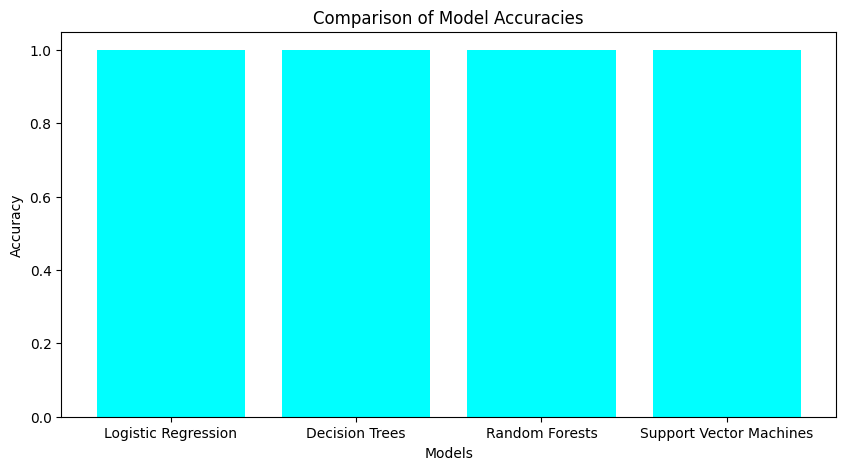

The most suitable model for the given task is: Logistic Regression


In [ ]:
 #compare their performances to determine the most suitable algorithm for the given task.

# Compare the accuracy scores of different models
models = ['Logistic Regression', 'Decision Trees', 'Random Forests', 'Support Vector Machines']
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svm]

# Create a bar chart to visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='cyan')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

# Based on the accuracy scores, choose the most suitable model
best_model_index = accuracies.index(max(accuracies))
best_model = models[best_model_index]

print("The most suitable model for the given task is:", best_model)
